In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
config_file = 'ssd_mobilenet.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [7]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
print(len(classLabels))

80


In [10]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000013C194CD090>

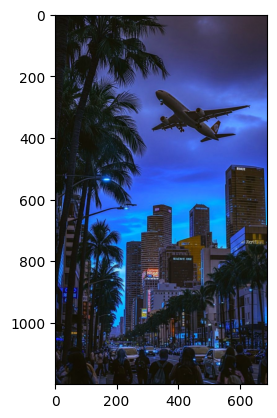

In [11]:
img = cv2.imread('picture.jpg')
plt.imshow(img)

In [12]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
print(classIndex)

[3 1 1 3 1 1 1 3 1 1 3 1]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    if ClassInd <= 80:
        cv2.rectangle(img, boxes, (255, 0, 0), 2)
        cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale,
                    color=(0, 255, 0), thickness=3)

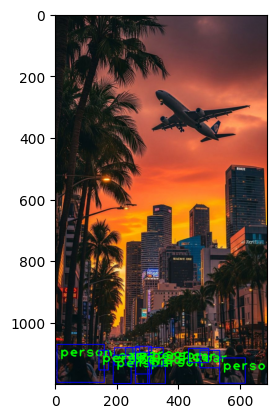

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
cap = cv2.VideoCapture('vedio.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    classIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)
    print(classIndex)

    if len(classIndex) != 0:
        for ClassInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (x + 10, y + 40),
                            font, fontScale=font_scale,
                            color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



[6 8 1 1]
()
[7 7]
[7 6 1]
[6 1 1]
[6 1 8 1 1]
[1 6 1 8 1 8 1]
[1 6 1 8 8 1 1]
[6 1 1 8 3 1 8 1]
[6 8 1 3 8 1]
[8 6 3 1 8 1]
[8 3 1 6 1 1]
[1 3 8 1 6 1]
[1 8 3 1 6 1]
[1 8 6 3 1 1]
[1 8 6 3 1 1]
[1 6 8 3 1 1 1]
[1 8 3 6 1 1 1 1 1]
[6 8 3 1 1 1 1 1 1]
[6 8 3 1 1 1 1 1 1]
[8 3 6 1 1 1 1 1 1]
[8 6 3 1 1 1]
[8 6 3 1 1 1]
[6 8 1 3 1]
[6 8 1 1 3]
[6 8 1 1 3]
[6 8 1 1 1 3 1 1]
[6 8 1 1]
[6 8 1 1 1 1]
[6 8 1 1 1]
[6 8 1 1 1 1]
[6 8 1 1 1]
[6 8 1 1]
[6 8 1 1 3]
[6 8 1 1 3]
[6 8 1 1 1 3 1]
[6 8 1 3 1]
[8 6 1 3]
[6 1 8 3 1 1 1]
[1 1 8 1 1 6 1]
[1 1 1 1 1 8 6 1 1]
[1 1 8 1 1 6 1 1 1 3]
[1 1 8 1 6 1 1 1]
[1 1 8 1 6 1 1 1]
[1 1 1 6 8 1 1]
[1 1 6 1 8 1 1 1]
[1 1 6 8 1 1 1 1 1]
[1 1 1 6 8 1 3 1]
[1 6 1 1 8 1]
[1 6 1 1 8 1]
[6 1 1 8 1 1 1 1]
[1 6 8 1 1 1 1]
[1 6 1 8 1 1 1 1 1 1]
[1 6 1 8 1 1 1 1 1]
[6 1 1 8 1 1 1]
[6 1 1 8 1 1 1]
[1 6 8 8]
[1 8 6 8 1]
[1 6 8 8 1 1]
[1 8 6 1 1 3 3]
[1 8 1 1 3 3]
[1 8 1 1 3 3]
[1 8 1 1 3]
[1 8 3 8 1 1]
[1 8 1 3 1 8 1]
[8 1 8 1 3 1 6]
[8 8 3 6]
[8 8 3]
[8 8]
[8 8]
[8 8]
[

KeyboardInterrupt: 

In [1]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    classIndex, confidece, bbox = model.detect(frame, confThreshold=0.5)
    print(classIndex)

    if len(classIndex) != 0:
        for ClassInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (x + 10, y + 40),
                            font, fontScale=font_scale,
                            color=(0, 255, 0), thickness=3)

    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



NameError: name 'cv2' is not defined